# 1. 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import requests

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

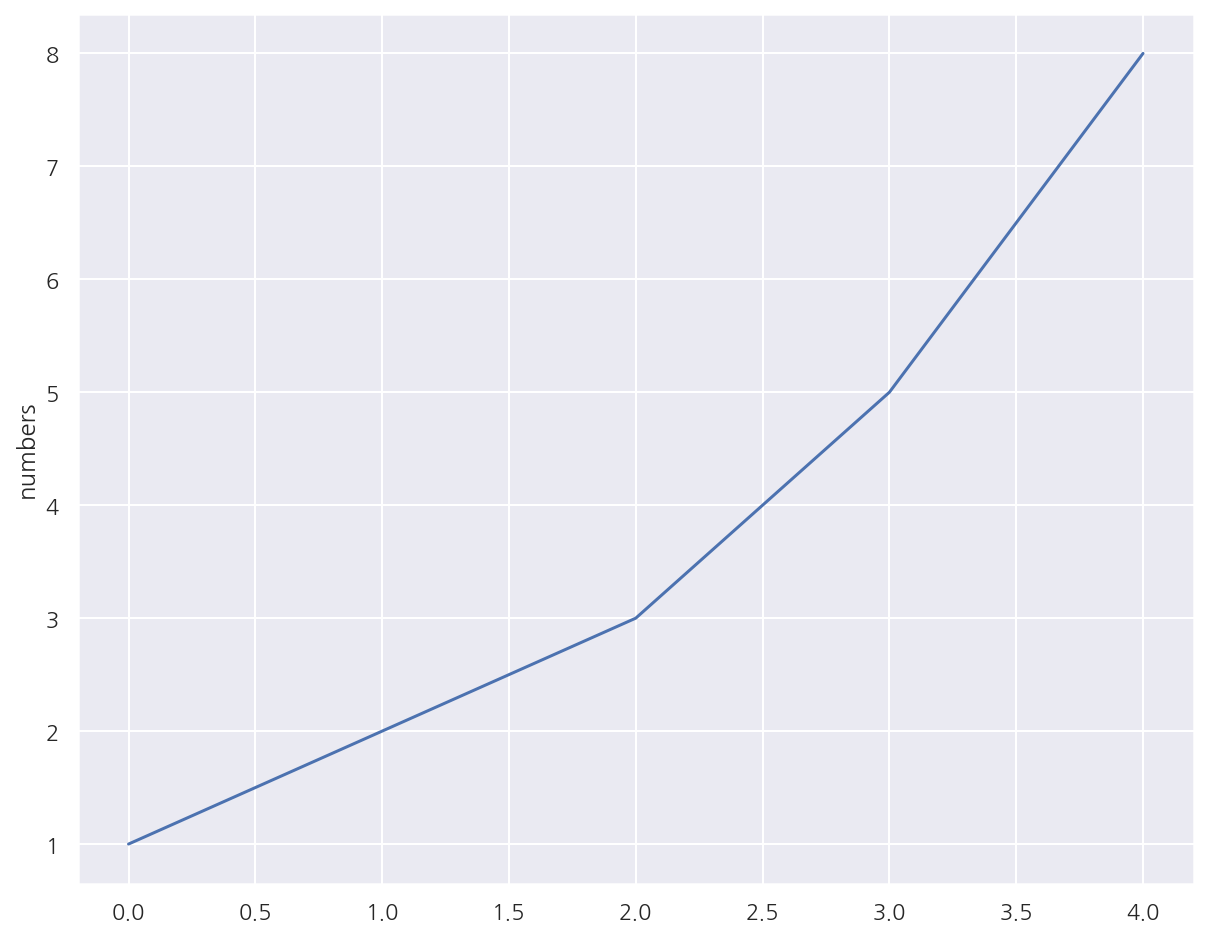

In [3]:
plt.plot([1, 2, 3, 5 ,8])
plt.ylabel("numbers")
plt.show()

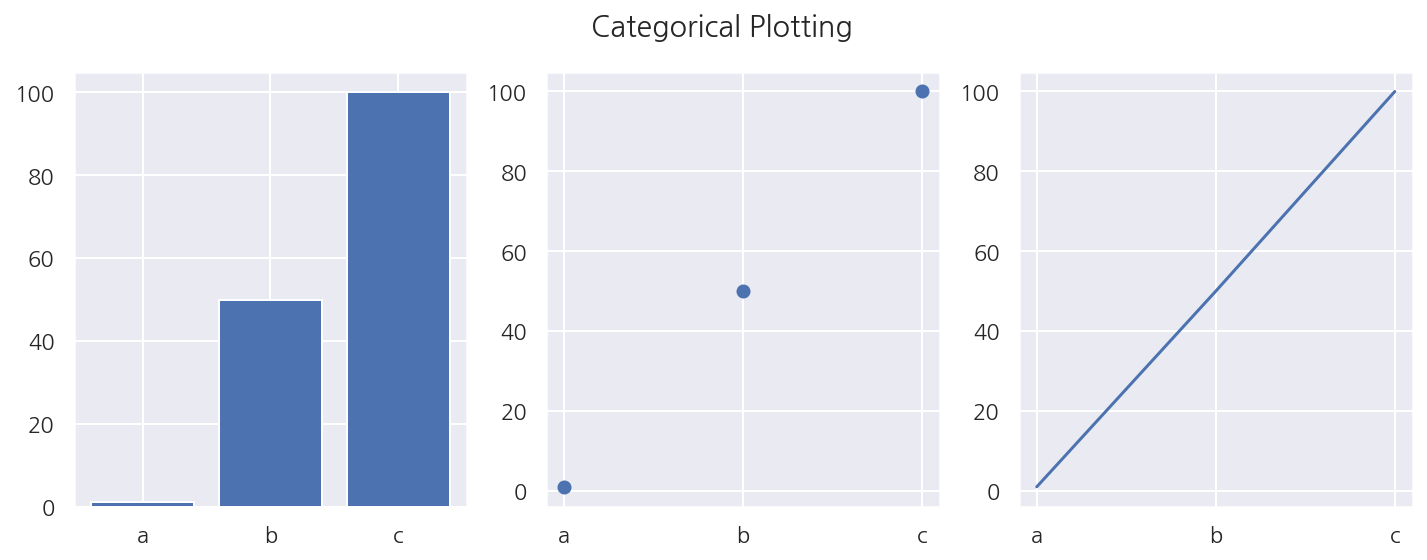

In [4]:
# subplot
alphabet = ["a", "b", "c"]
values = [1, 50, 100]

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.bar(alphabet, values)

plt.subplot(1,3,2)
plt.scatter(alphabet, values)

plt.subplot(1,3,3)
plt.plot(alphabet, values)

plt.suptitle("Categorical Plotting")
plt.show()

In [5]:
data = pd.read_csv("Day09_01_BIPA_data.csv", index_col=0)

In [6]:
# 일부 챔피언에 대한 평균값 정보 (10개가 아닌 9개의 챔피언 id 0은 없음)
data1_10 = data[data['championId'].isin(range(0,10))]
group1_10 = data1_10.groupby("championId", as_index=False).mean()

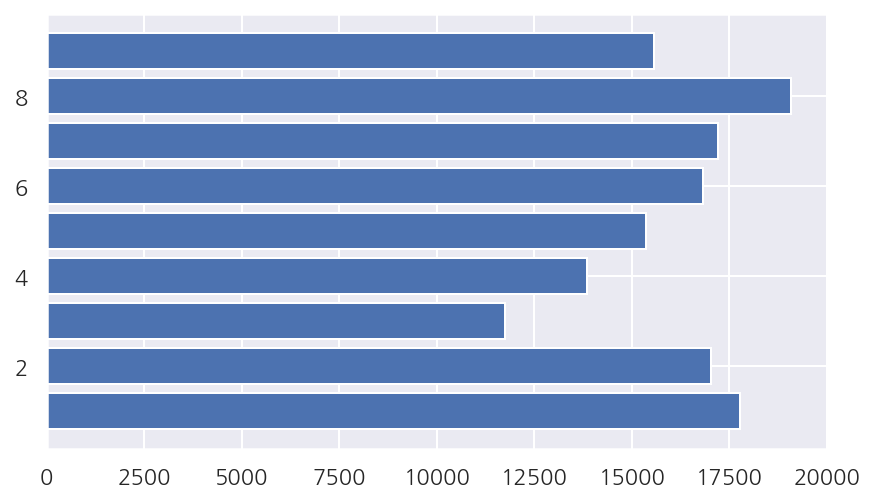

In [7]:
# 챔피언별 총 딜량
fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['championId'], group1_10['totalDamageDealtToChampions'])
fig.show()

In [8]:
# 각 버전 (챔피언, 룬, 아이템 등..)
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/' + champ_ver + '/data/en_US/champion.json'

# 챔피언 정보 url
request = requests.get(championJsonURL)
champion_data = request.json()
champion_data.keys()

dict_keys(['type', 'format', 'version', 'data'])

In [9]:
# 챔피언 id, name 데이터 프레임
champion_dict = {}

for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
    
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])

In [10]:
# merge, 챔피언 이름 추가
group1_10 = pd.merge(group1_10, champion, left_on="championId", right_index=True)

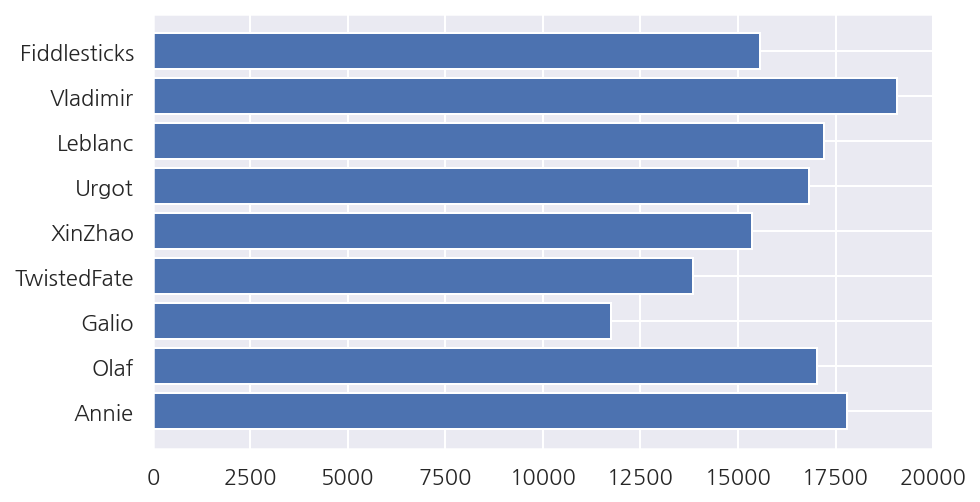

In [11]:
# 챔피언 이름으로 y축 변경
fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])
fig.show()

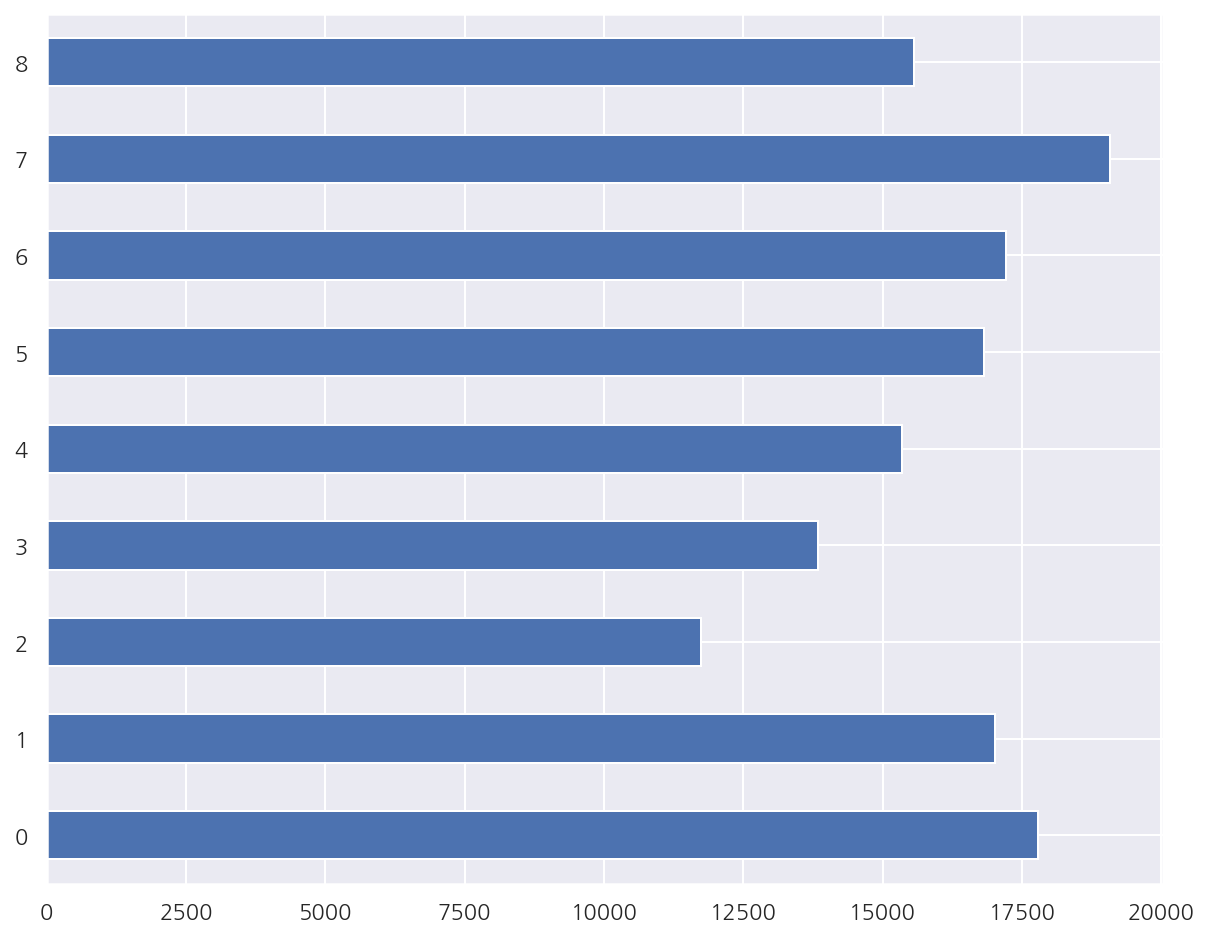

In [12]:
# pandas에서 plot
group1_10['totalDamageDealtToChampions'].plot(kind='barh')
plt.show()

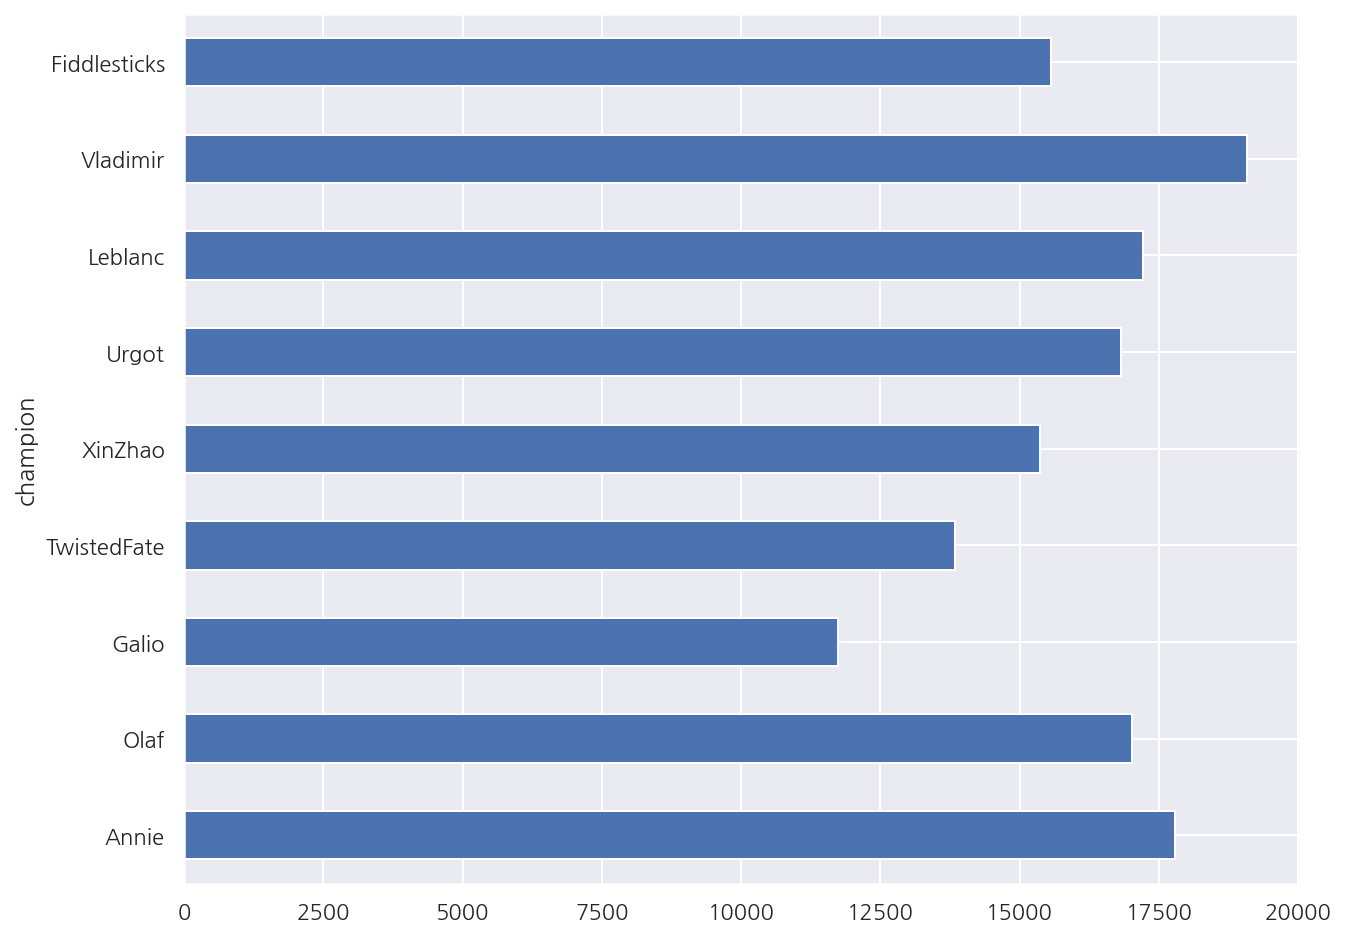

In [13]:
# index 변경
group1_10.index = group1_10.champion
group1_10['totalDamageDealtToChampions'].plot(kind='barh')
plt.show()

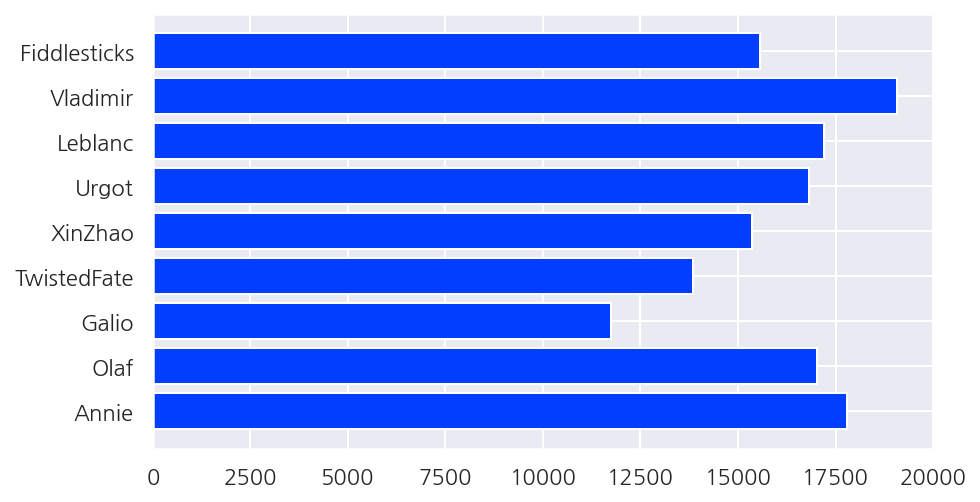

In [14]:
# color 스타일 변경 (영구)
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])
fig.show()

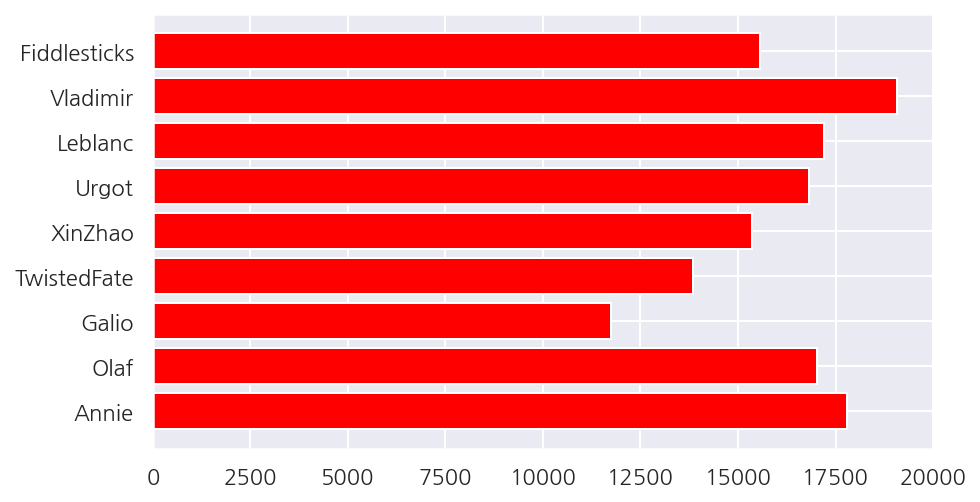

In [15]:
# color 변경
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'], color="red")
fig.show()

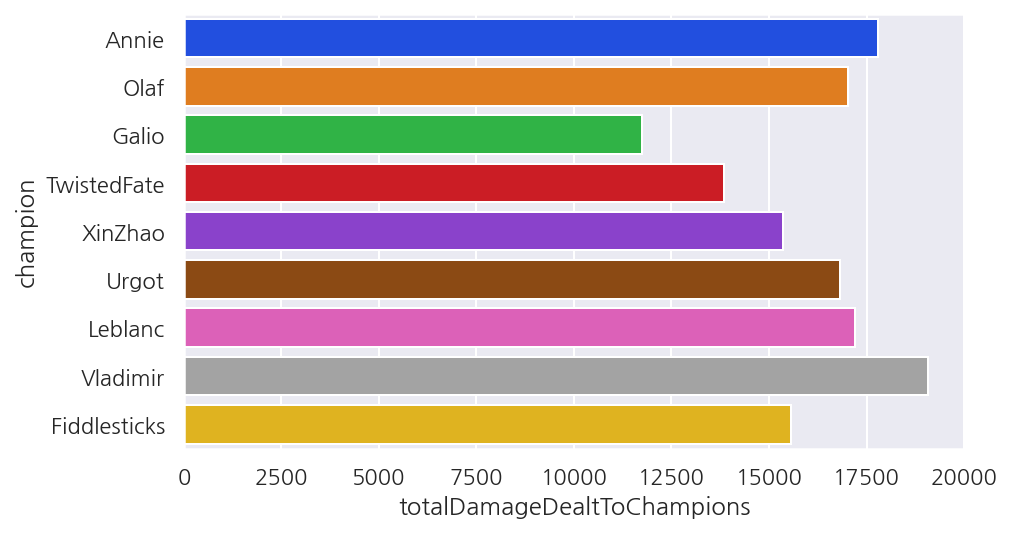

In [16]:
# seaborn
fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')
plt.show()

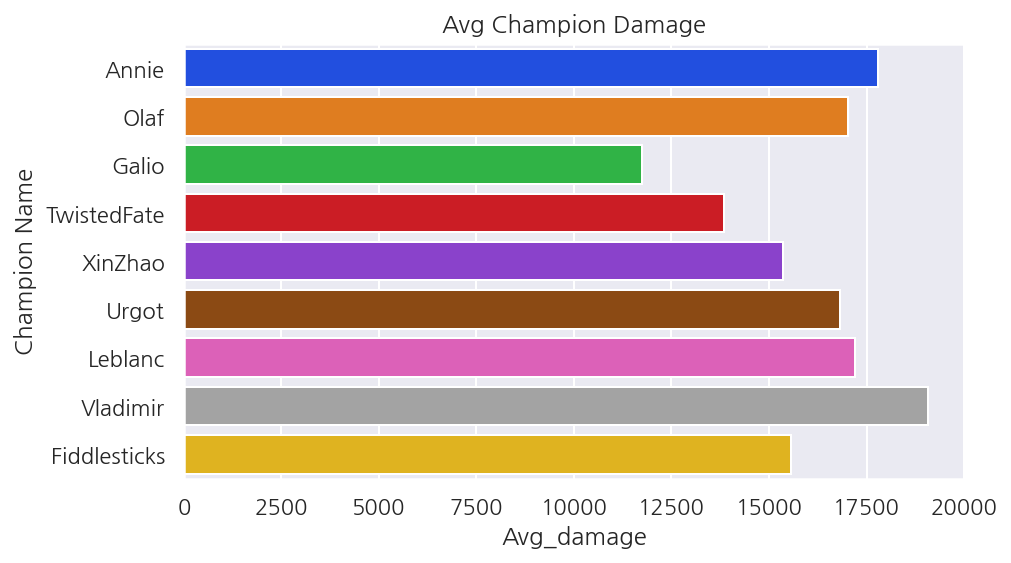

In [17]:
# xlabel, ylabel, title
fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

ax.set_xlabel("Avg_damage")
ax.set_ylabel("Champion Name")
ax.set_title("Avg Champion Damage")

plt.show()

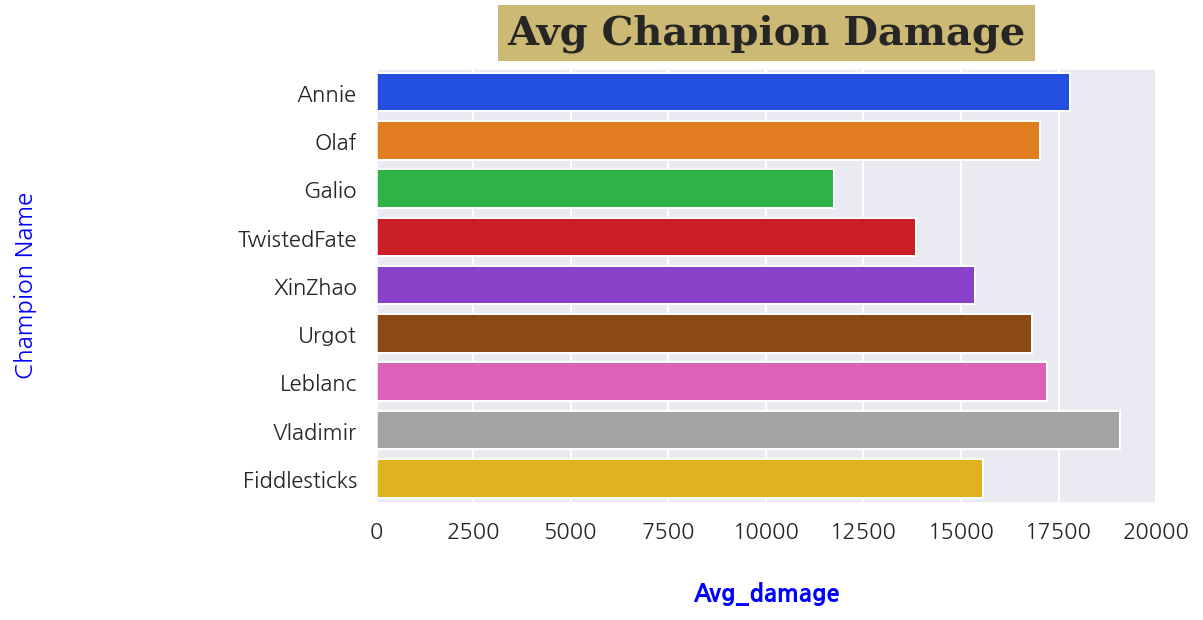

In [18]:
# font style
font_label = {
    'color': 'blue',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
    'backgroundcolor': 'y',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

# pad 옵션은 축과의 거리 옵션
ax.set_xlabel("Avg_damage", fontdict=font_label, labelpad=20)
ax.set_ylabel("Champion Name", color='blue', labelpad=100)
ax.set_title("Avg Champion Damage", fontdict=font_title, pad=12)

plt.show()

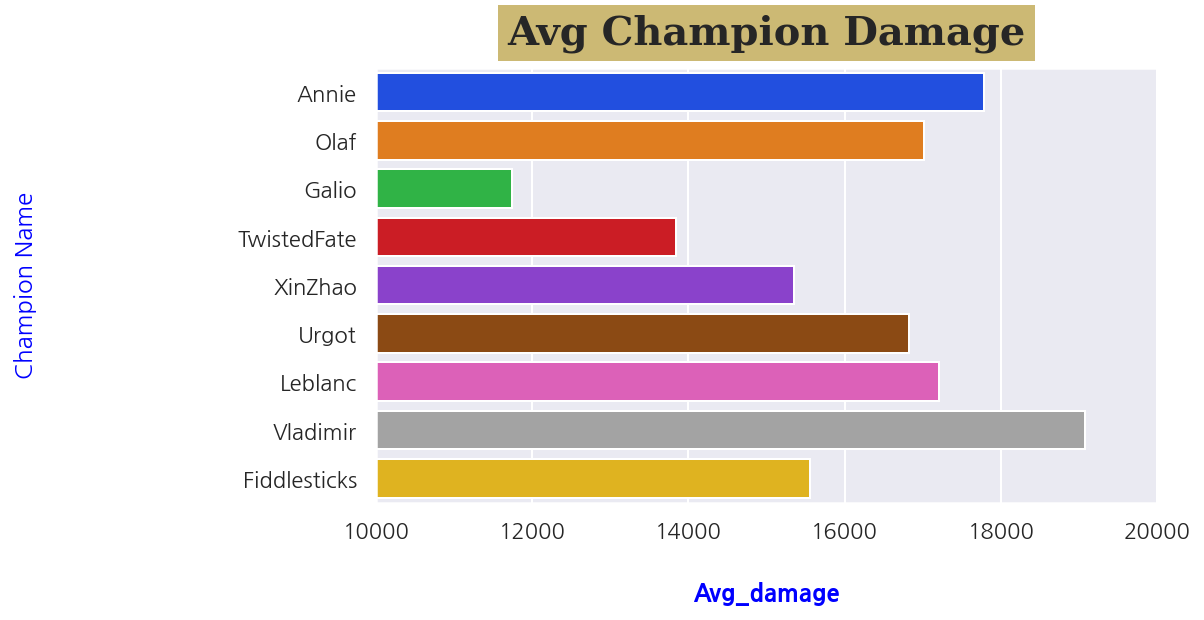

In [19]:
# font style
font_label = {
    'color': 'blue',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
    'backgroundcolor': 'y',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

# pad 옵션은 축과의 거리 옵션
ax.set_xlabel("Avg_damage", fontdict=font_label, labelpad=20)
ax.set_ylabel("Champion Name", color='blue', labelpad=100)
ax.set_title("Avg Champion Damage", fontdict=font_title, pad=12)

# x축 범위 설정
ax.set_xlim(10000, 20000)

plt.show()

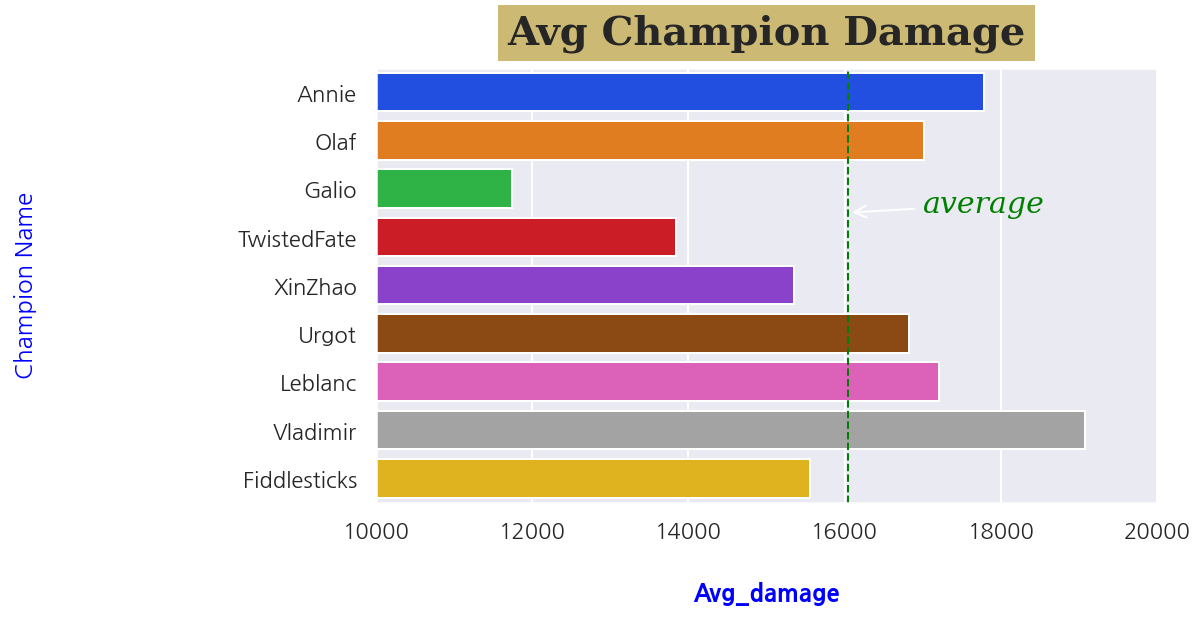

In [20]:
# font style
font_label = {
    'color': 'blue',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
    'backgroundcolor': 'y',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

# pad 옵션은 축과의 거리 옵션
ax.set_xlabel("Avg_damage", fontdict=font_label, labelpad=20)
ax.set_ylabel("Champion Name", color='blue', labelpad=100)
ax.set_title("Avg Champion Damage", fontdict=font_title, pad=12)

# x축 범위 설정
ax.set_xlim(10000, 20000)
ax.axvline(damage_mean, ls='--', lw=1, color='green')
# 평균값 선 추가해주기
damage_mean = group1_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls='--', lw=1, color='green')

# 화살표 추가
arrowprops = {
    'arrowstyle': '->'
}
ax.annotate("average", (damage_mean, 2.5), xytext=(17000,2.5), color='green',
            fontfamily='serif', fontstyle='italic', fontsize=15, arrowprops = arrowprops)

plt.show()

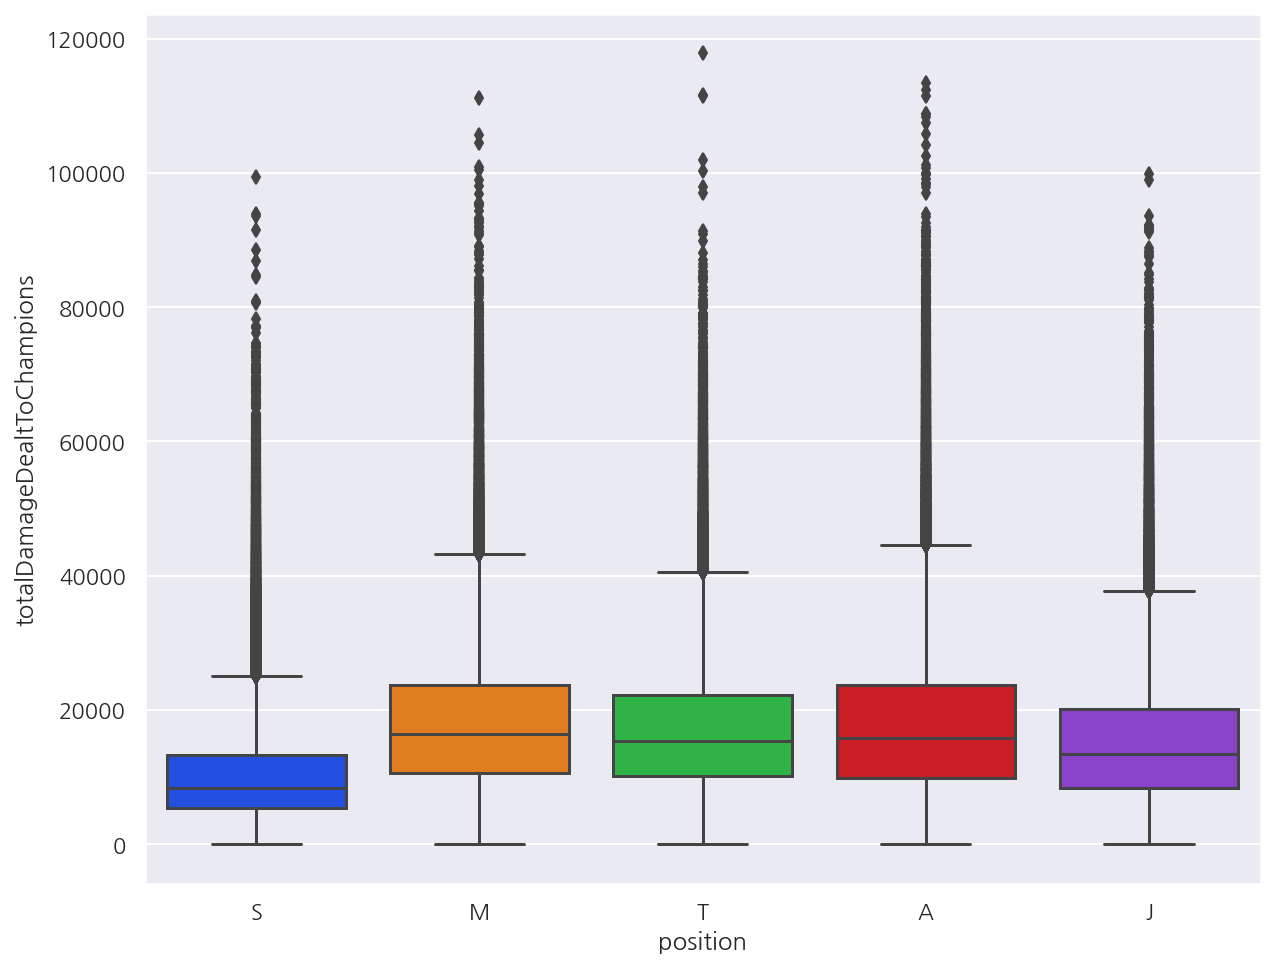

In [21]:
# boxplot
sns.boxplot(y = data['totalDamageDealtToChampions'], x = data['position'])
plt.show()

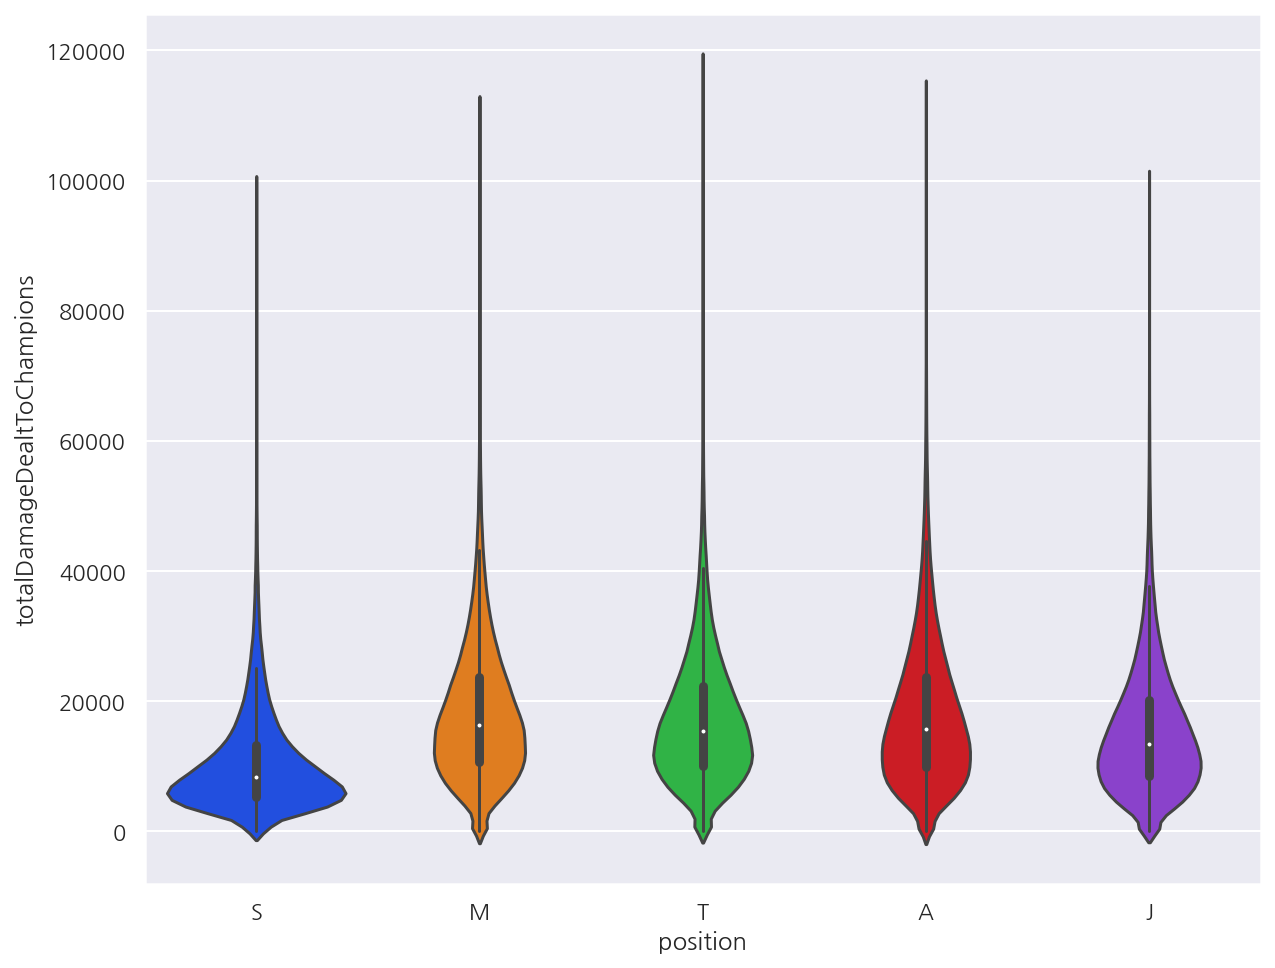

In [22]:
# boxplot
sns.violinplot(y = data['totalDamageDealtToChampions'], x = data['position'])
plt.show()

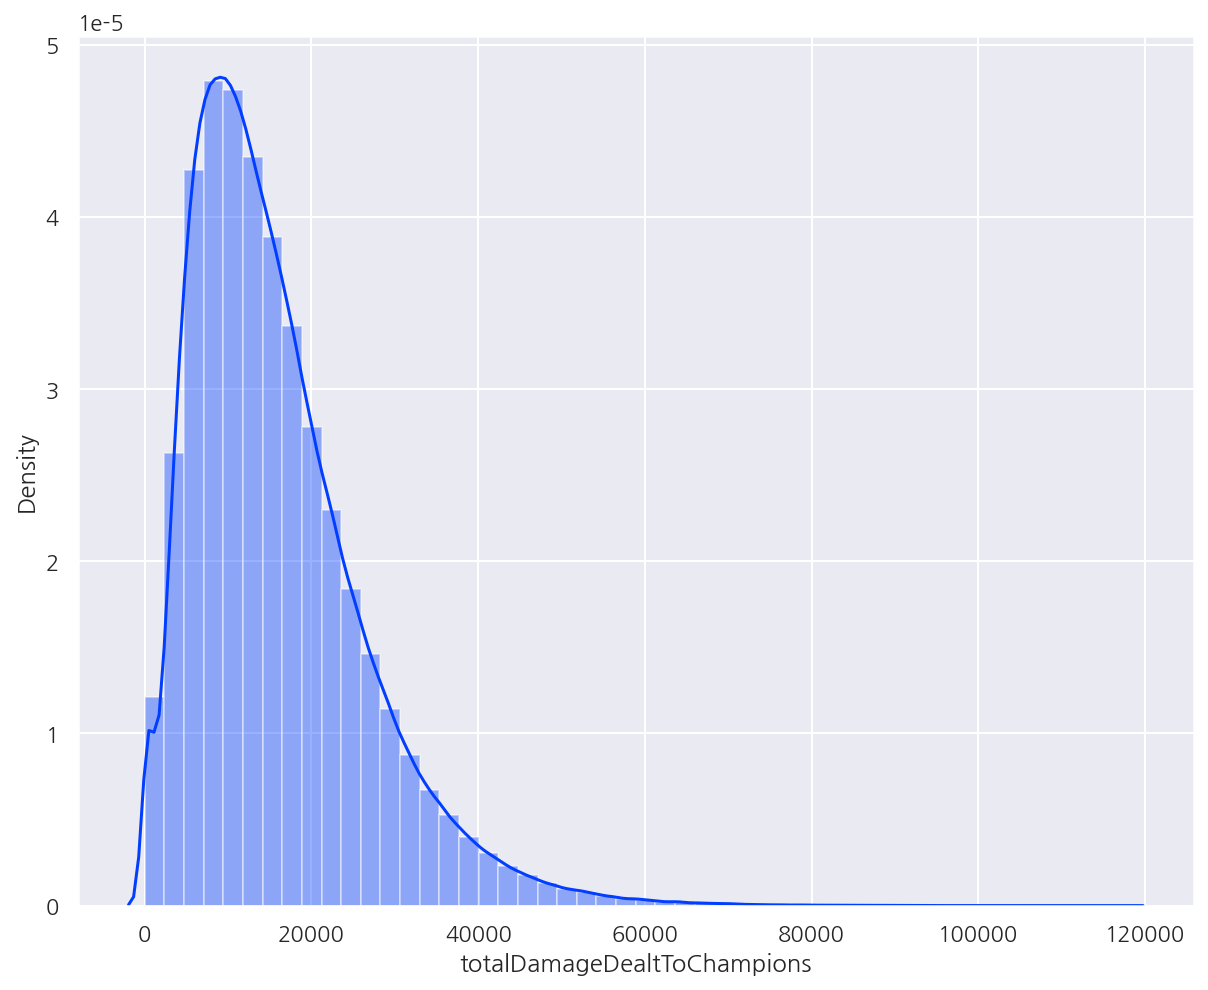

In [23]:
# distplot
sns.distplot(data['totalDamageDealtToChampions'])
plt.show()

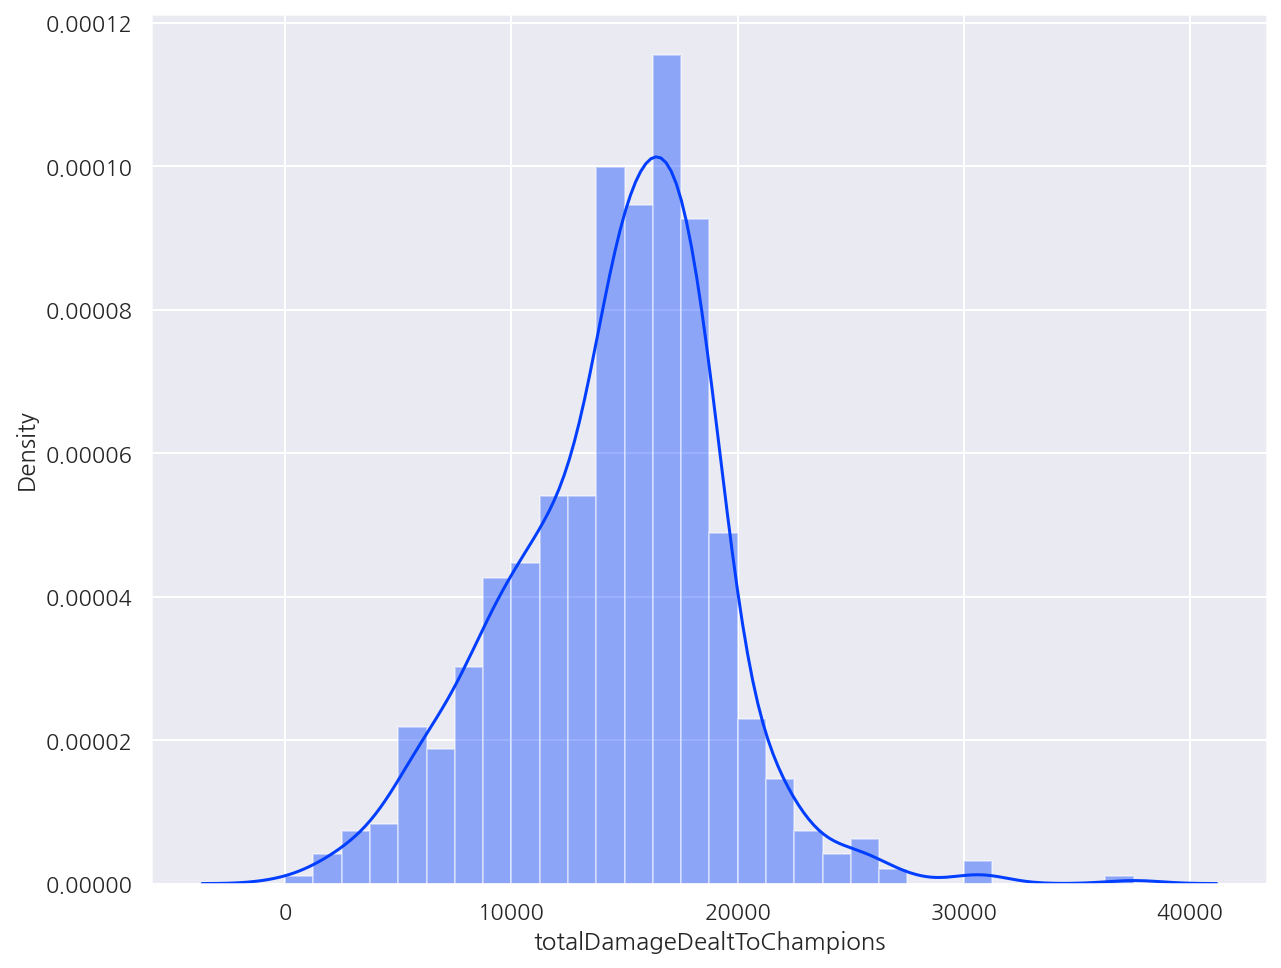

In [25]:
# distplot
group_data = data[data['gameLength']>200].groupby(['position','championId'], as_index=False).mean()
# sns.distplot(group_data, x='totalDamageDealtToChampions', hue='position')
sns.distplot(group_data['totalDamageDealtToChampions'])
plt.show()

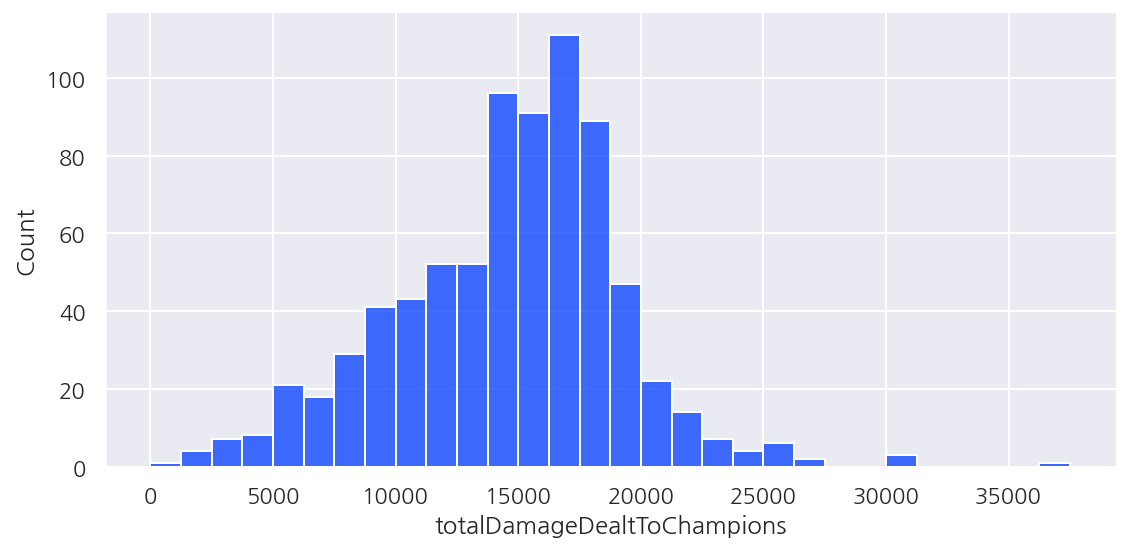

In [26]:
# displot
# distplot은 figure size가 안먹혀서 displot으로 heigt, aspect로 설정가능
sns.displot(group_data['totalDamageDealtToChampions'], height=4, aspect=2)
plt.show()

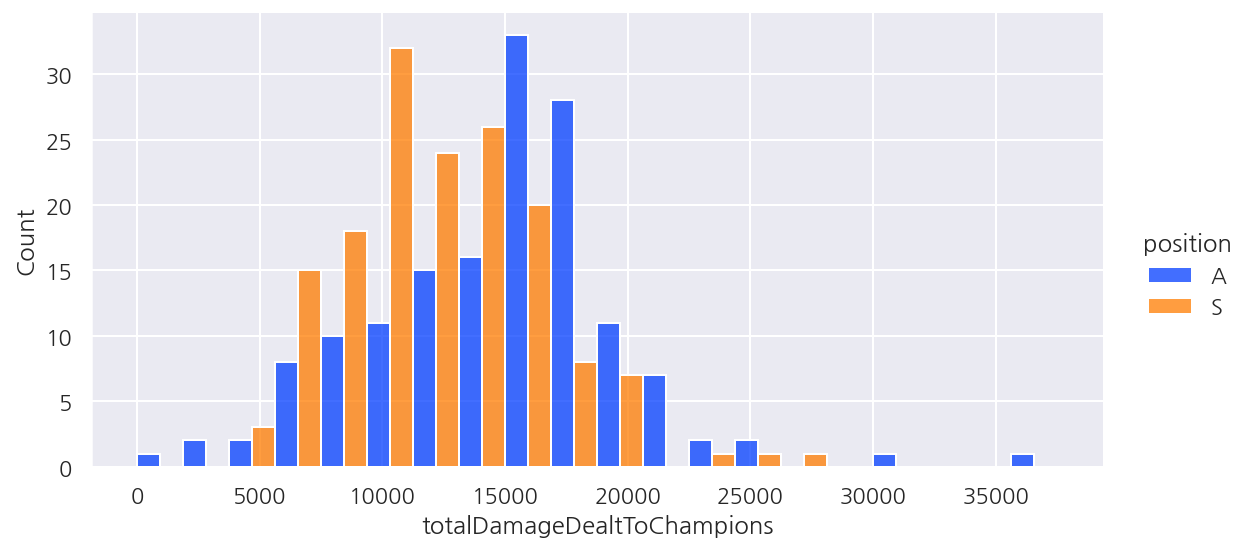

In [27]:
# displot
sns.displot(group_data[group_data['position'].isin(['A','S'])], 
            x = 'totalDamageDealtToChampions', hue='position', multiple='dodge', height=4, aspect=2)
plt.show()

In [28]:
# 챔피언별 level당 stat 정보 등
champ_stats = pd.read_csv('Day09_01_champ_stats.csv')

In [29]:
champ_stats

,championId,championName,versionIndex,version,hp,hpperlevel,mp,mpperlevel,movespeed,armor,...,attackspeed,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
0,1,Annie,11.17,11.17.394.4489,524.0,88,418.0,25.0,335,19,...,0.579,2020.0,843.0,87.00,38.50,14.85,21.60,0,94.71,0.7129
1,2,Olaf,11.17,11.17.394.4489,575.0,100,316.0,42.0,350,35,...,0.694,2275.0,1030.0,86.00,53.25,23.80,17.70,0,127.50,1.0125
2,3,Galio,11.17,11.17.394.4489,562.0,112,500.0,40.0,335,24,...,0.625,2466.0,1180.0,83.50,53.25,21.60,21.40,0,118.50,0.7844
3,4,TwistedFate,11.17,11.17.394.4489,534.0,94,333.0,39.0,330,21,...,0.651,2132.0,996.0,74.55,38.50,15.70,21.60,0,108.10,1.0074
4,5,XinZhao,11.17,11.17.394.4489,570.0,92,274.0,55.0,345,35,...,0.645,2134.0,1209.0,94.50,53.25,19.90,14.91,0,114.00,1.0288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,555,Pyke,11.17,11.17.394.4489,600.0,90,415.0,50.0,330,45,...,0.667,2130.0,1265.0,104.50,53.25,15.50,25.00,0,96.00,0.9505
152,777,Yone,11.17,11.17.394.4489,550.0,85,500.0,0.0,345,28,...,0.625,1995.0,500.0,85.80,53.25,20.25,0.00,0,94.00,0.9969
153,875,Sett,11.17,11.17.394.4489,600.0,93,0.0,0.0,340,33,...,0.625,2181.0,0.0,101.00,53.25,15.50,0.00,0,128.00,0.8109
154,876,Lillia,11.17,11.17.394.4489,580.0,90,410.0,50.0,330,22,...,0.625,2110.0,1260.0,90.00,44.75,20.25,27.65,0,113.70,0.9119


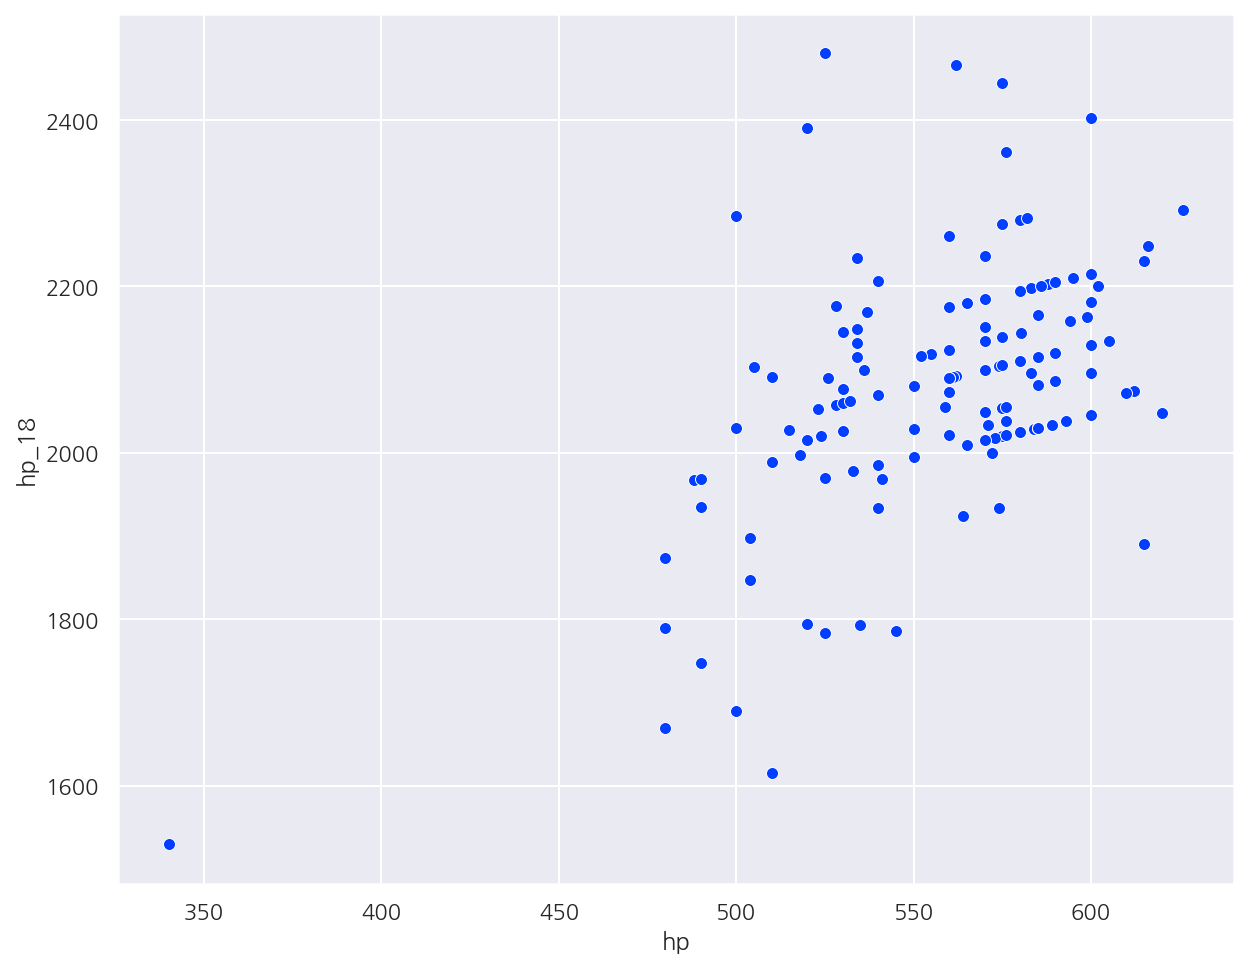

In [30]:
# scatterplot
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')
plt.show()

In [31]:
champ_stats.columns

Index(['championId', 'championName', 'versionIndex', 'version', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit', 'critperlevel',
       'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel',
       'attackspeed', 'hp_18', 'mp_18', 'armor_18', 'spellblock_18',
       'hpregen_18', 'mpregen_18', 'crit_18', 'attackdamage_18',
       'attackspeed_18'],
      dtype='object')

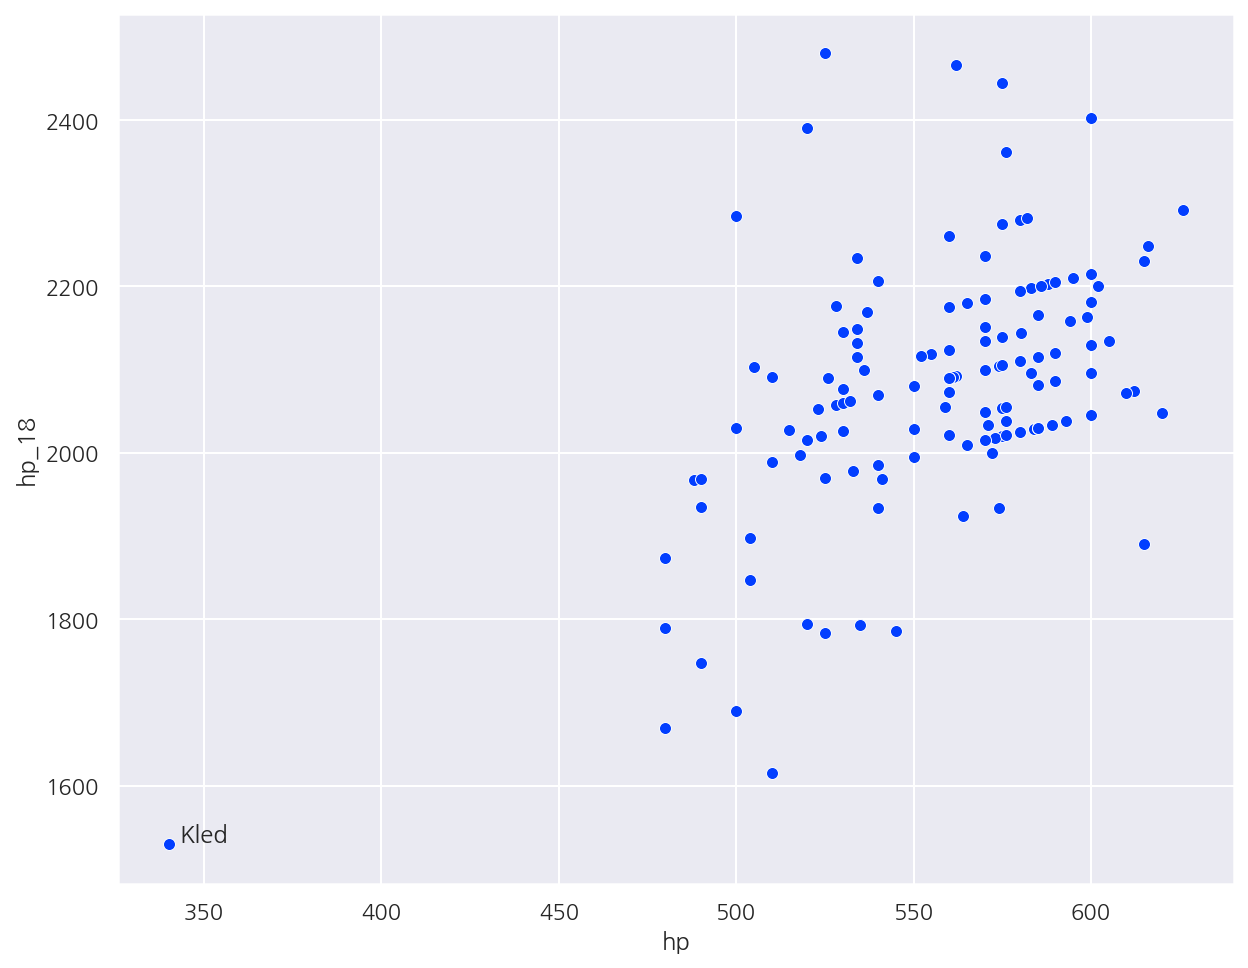

In [32]:
# text 삽입
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')

plt.text(x = champ_stats[champ_stats['championName'] == 'Kled']['hp'] + 3,
         y = champ_stats[champ_stats['championName'] == 'Kled']['hp_18'] + 3,
         s = 'Kled')

plt.show()

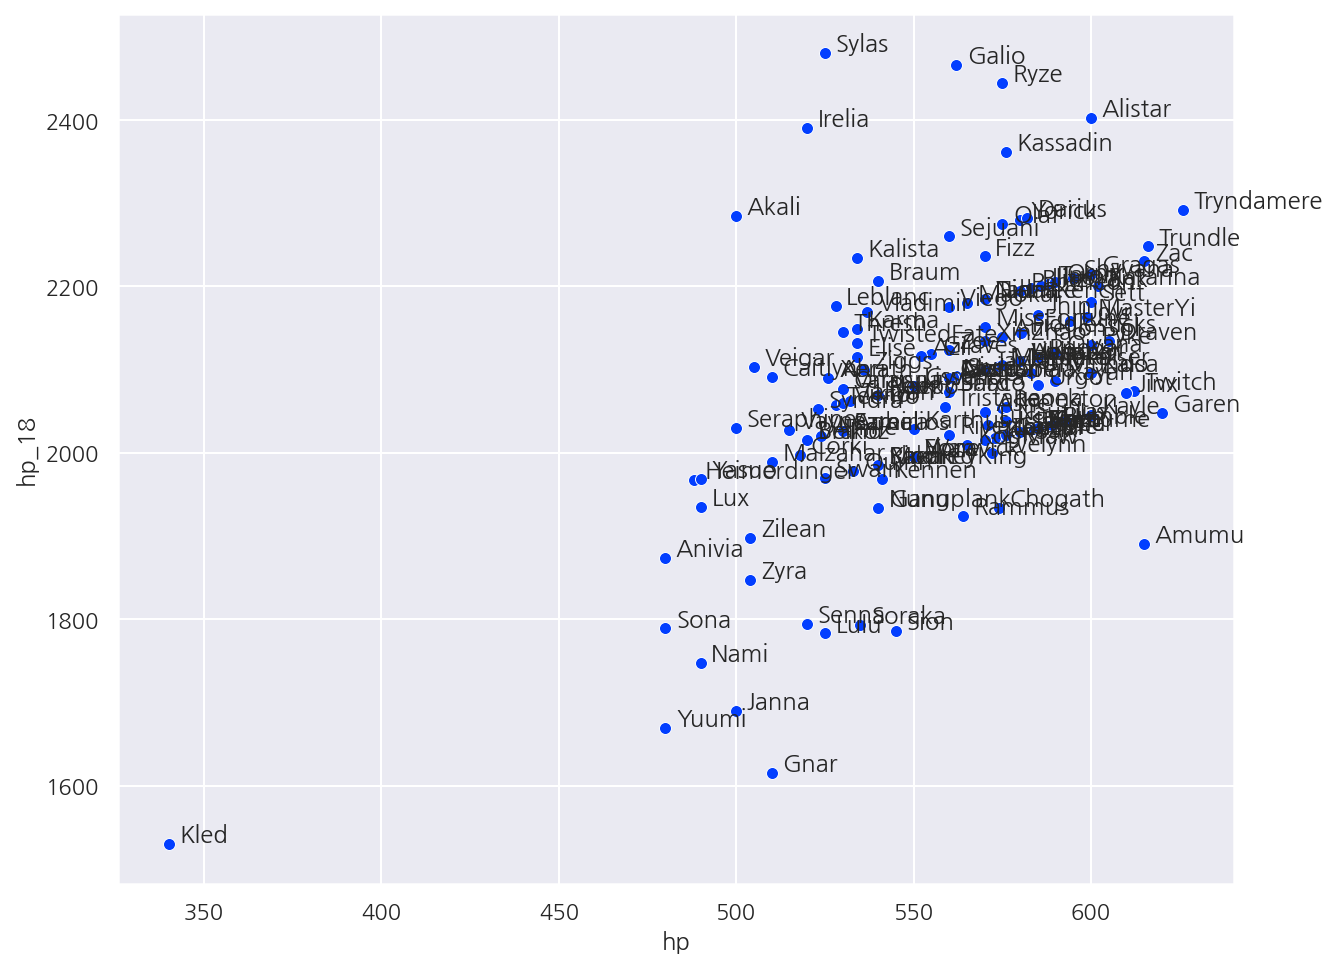

In [33]:
# 모든 챔피언 이름 넣기
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')

for name in champ_stats['championName'].values:
    plt.text(x = champ_stats[champ_stats['championName'] == name]['hp'] + 3,
             y = champ_stats[champ_stats['championName'] == name]['hp_18'] + 3,
             s = name)

plt.show()

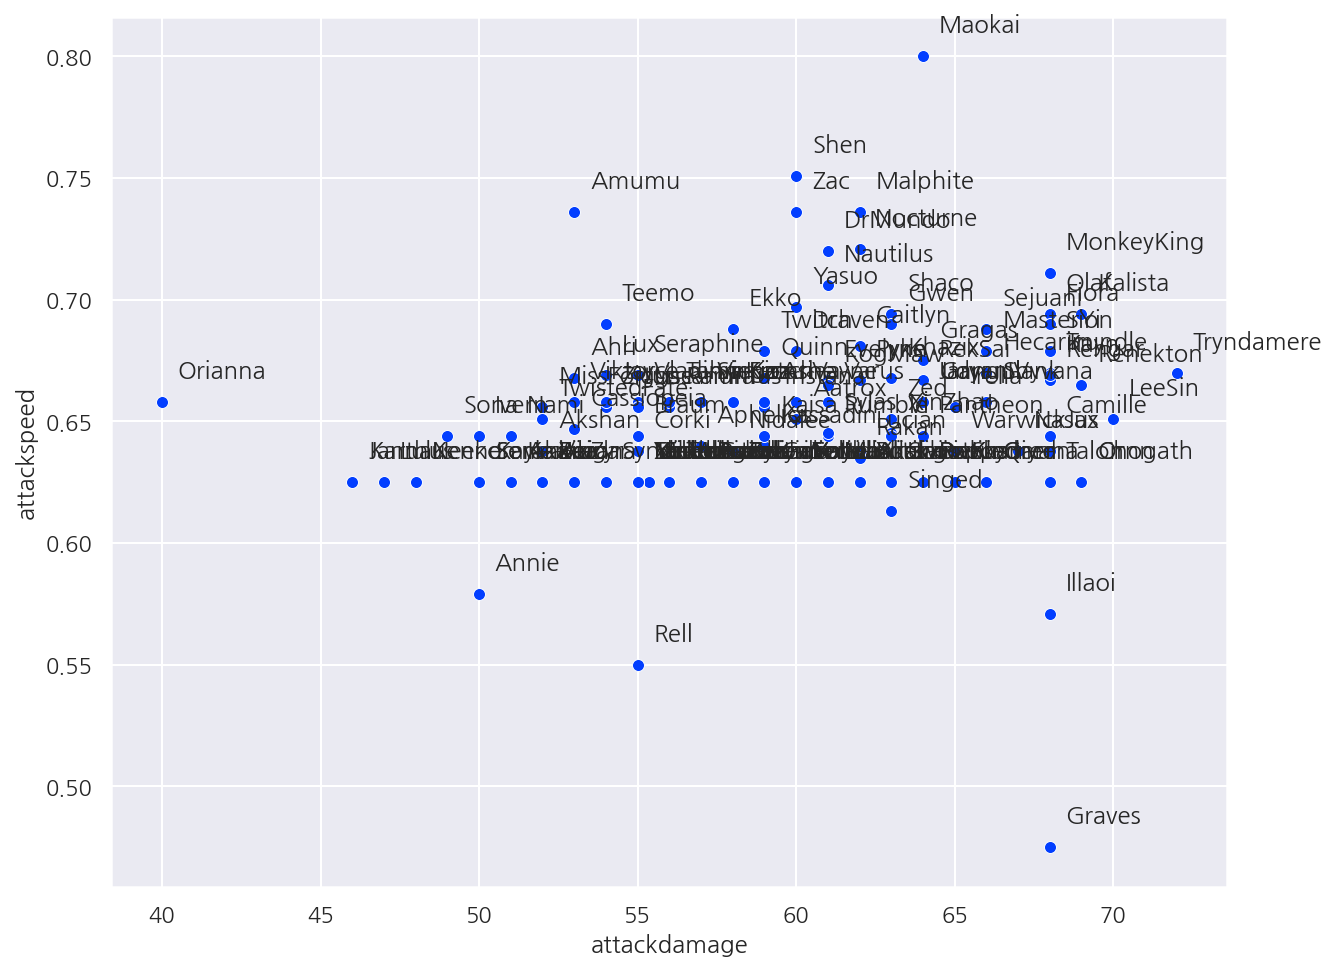

In [34]:
# 공격력과 공격속도
sns.scatterplot(data=champ_stats, x='attackdamage', y='attackspeed')

for name in champ_stats['championName'].values:
    plt.text(x = champ_stats[champ_stats['championName'] == name]['attackdamage'] + 0.5,
             y = champ_stats[champ_stats['championName'] == name]['attackspeed'] + 0.01,
             s = name)

plt.show()

# 2. 함수 정의 및 apply

In [35]:
# sample data
data = pd.DataFrame([[1,2,3,4], [5,6,7,8], [9,8,7,6]],
                    index = ['a', 'b', 'c'], columns = ["A", "B", "C", "D"])

In [36]:
data

,A,B,C,D
a,1,2,3,4
b,5,6,7,8
c,9,8,7,6


In [37]:
# 열 단위
data.apply(np.mean, axis=0)

A    5.000000
B    5.333333
C    5.666667
D    6.000000
dtype: float64

In [38]:
# 행 단위
data.apply(np.mean, axis=1)

a    2.5
b    6.5
c    7.5
dtype: float64

In [39]:
# exponential
data.apply(np.exp)

,A,B,C,D
a,2.718282,7.389056,20.085537,54.598150
b,148.413159,403.428793,1096.633158,2980.957987
c,8103.083928,2980.957987,1096.633158,403.428793


In [40]:
data.apply(lambda x: x["A"] + x["B"], axis=1)

a     3
b    11
c    17
dtype: int64

In [41]:
data.apply(lambda x: x["a"] + x["c"], axis=0)

A    10
B    10
C    10
D    10
dtype: int64

In [42]:
# 함수 이용
def multiply_2(x):
    return x*2

data.apply(lambda x: multiply_2(x))

,A,B,C,D
a,2,4,6,8
b,10,12,14,16
c,18,16,14,12


In [43]:
# 함수 이용2
def hello(x):
    return 'hello my name is ' + x

hello("Me")

'hello my name is Me'

In [44]:
data = pd.read_csv("Day09_01_BIPA_data.csv", index_col=0)

In [45]:
data

,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,championsKilled,...,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version
0,5383880006,2021-08-11 06:59:31,P318,S,200,3210877,99,WIN,10,4,...,3602,0,0,11,2830,2181,2181,NONE,972,11.16.390.1945
1,5383880006,2021-08-11 06:59:31,P466,S,100,7550211,35,LOSE,8,1,...,5077,0,2,24,2013,0,0,NONE,972,11.16.390.1945
2,5383880006,2021-08-11 06:59:31,P329,M,200,9306696,266,WIN,11,5,...,11029,0,0,15,6158,585,585,NONE,972,11.16.390.1945
3,5383880006,2021-08-11 06:59:31,P461,T,200,20281103,92,WIN,11,8,...,9944,0,0,10,7615,2318,2318,NONE,972,11.16.390.1945
4,5383880006,2021-08-11 06:59:31,P30,A,200,26082075,22,WIN,10,3,...,6387,0,0,13,3218,2370,2370,NONE,972,11.16.390.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5384659633,2021-08-11 17:20:44,S146,S,100,21560397,53,WIN,15,1,...,32961,0,0,63,34725,1978,126,BOTTOM,2379,11.16.390.1945
999996,5384659633,2021-08-11 17:20:44,G442,M,100,46320531,166,WIN,18,10,...,24674,1,16,16,21371,8406,7042,MIDDLE,2379,11.16.390.1945
999997,5384659633,2021-08-11 17:20:44,G418,J,200,64820251,64,LOSE,17,5,...,45911,6,68,22,62426,20292,454,JUNGLE,2379,11.16.390.1945
999998,5384659633,2021-08-11 17:20:44,S178,A,100,72310857,81,WIN,17,6,...,28187,8,9,17,19664,11090,1062,BOTTOM,2379,11.16.390.1945


In [46]:
# 첫 글자 가져오기
data["tierRank"].str[:1]

0         P
1         P
2         P
3         P
4         P
         ..
999995    S
999996    G
999997    G
999998    S
999999    G
Name: tierRank, Length: 1000000, dtype: object

In [47]:
# 첫 글자 가져오기 apply
# data["tierRank"].apply(lambda x: x[0])

- 실행시 결측 값이 존재해서 float형태로 입력되어 있기에 인덱싱이 안됨(문자열 x)

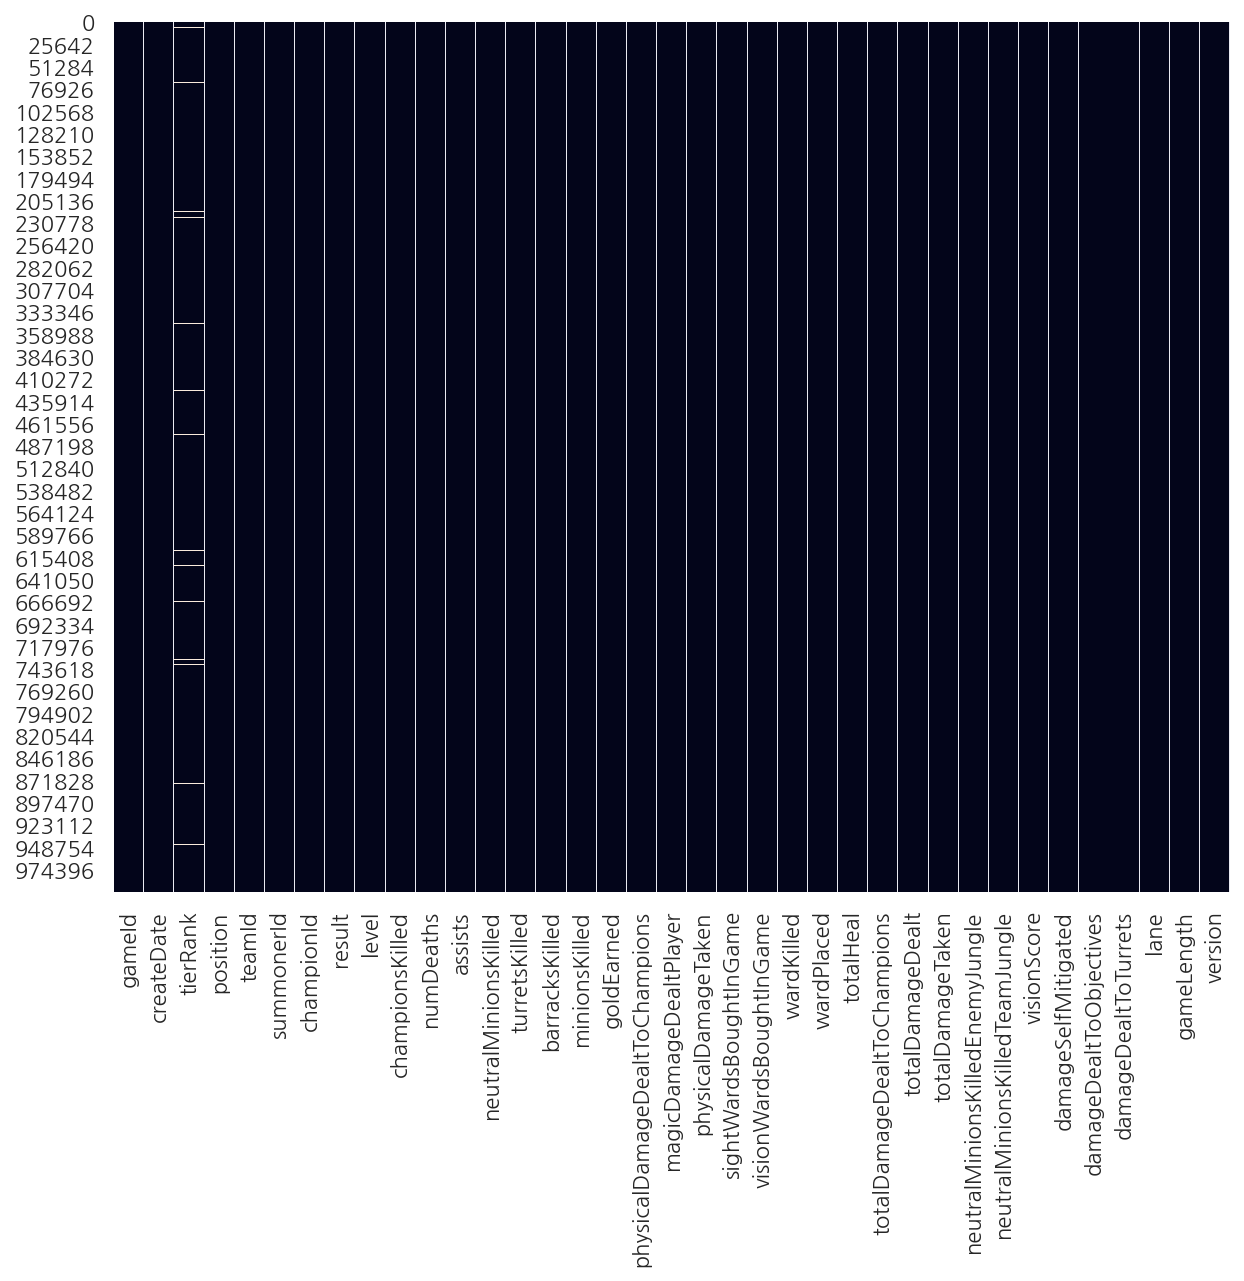

In [48]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

<AxesSubplot:>

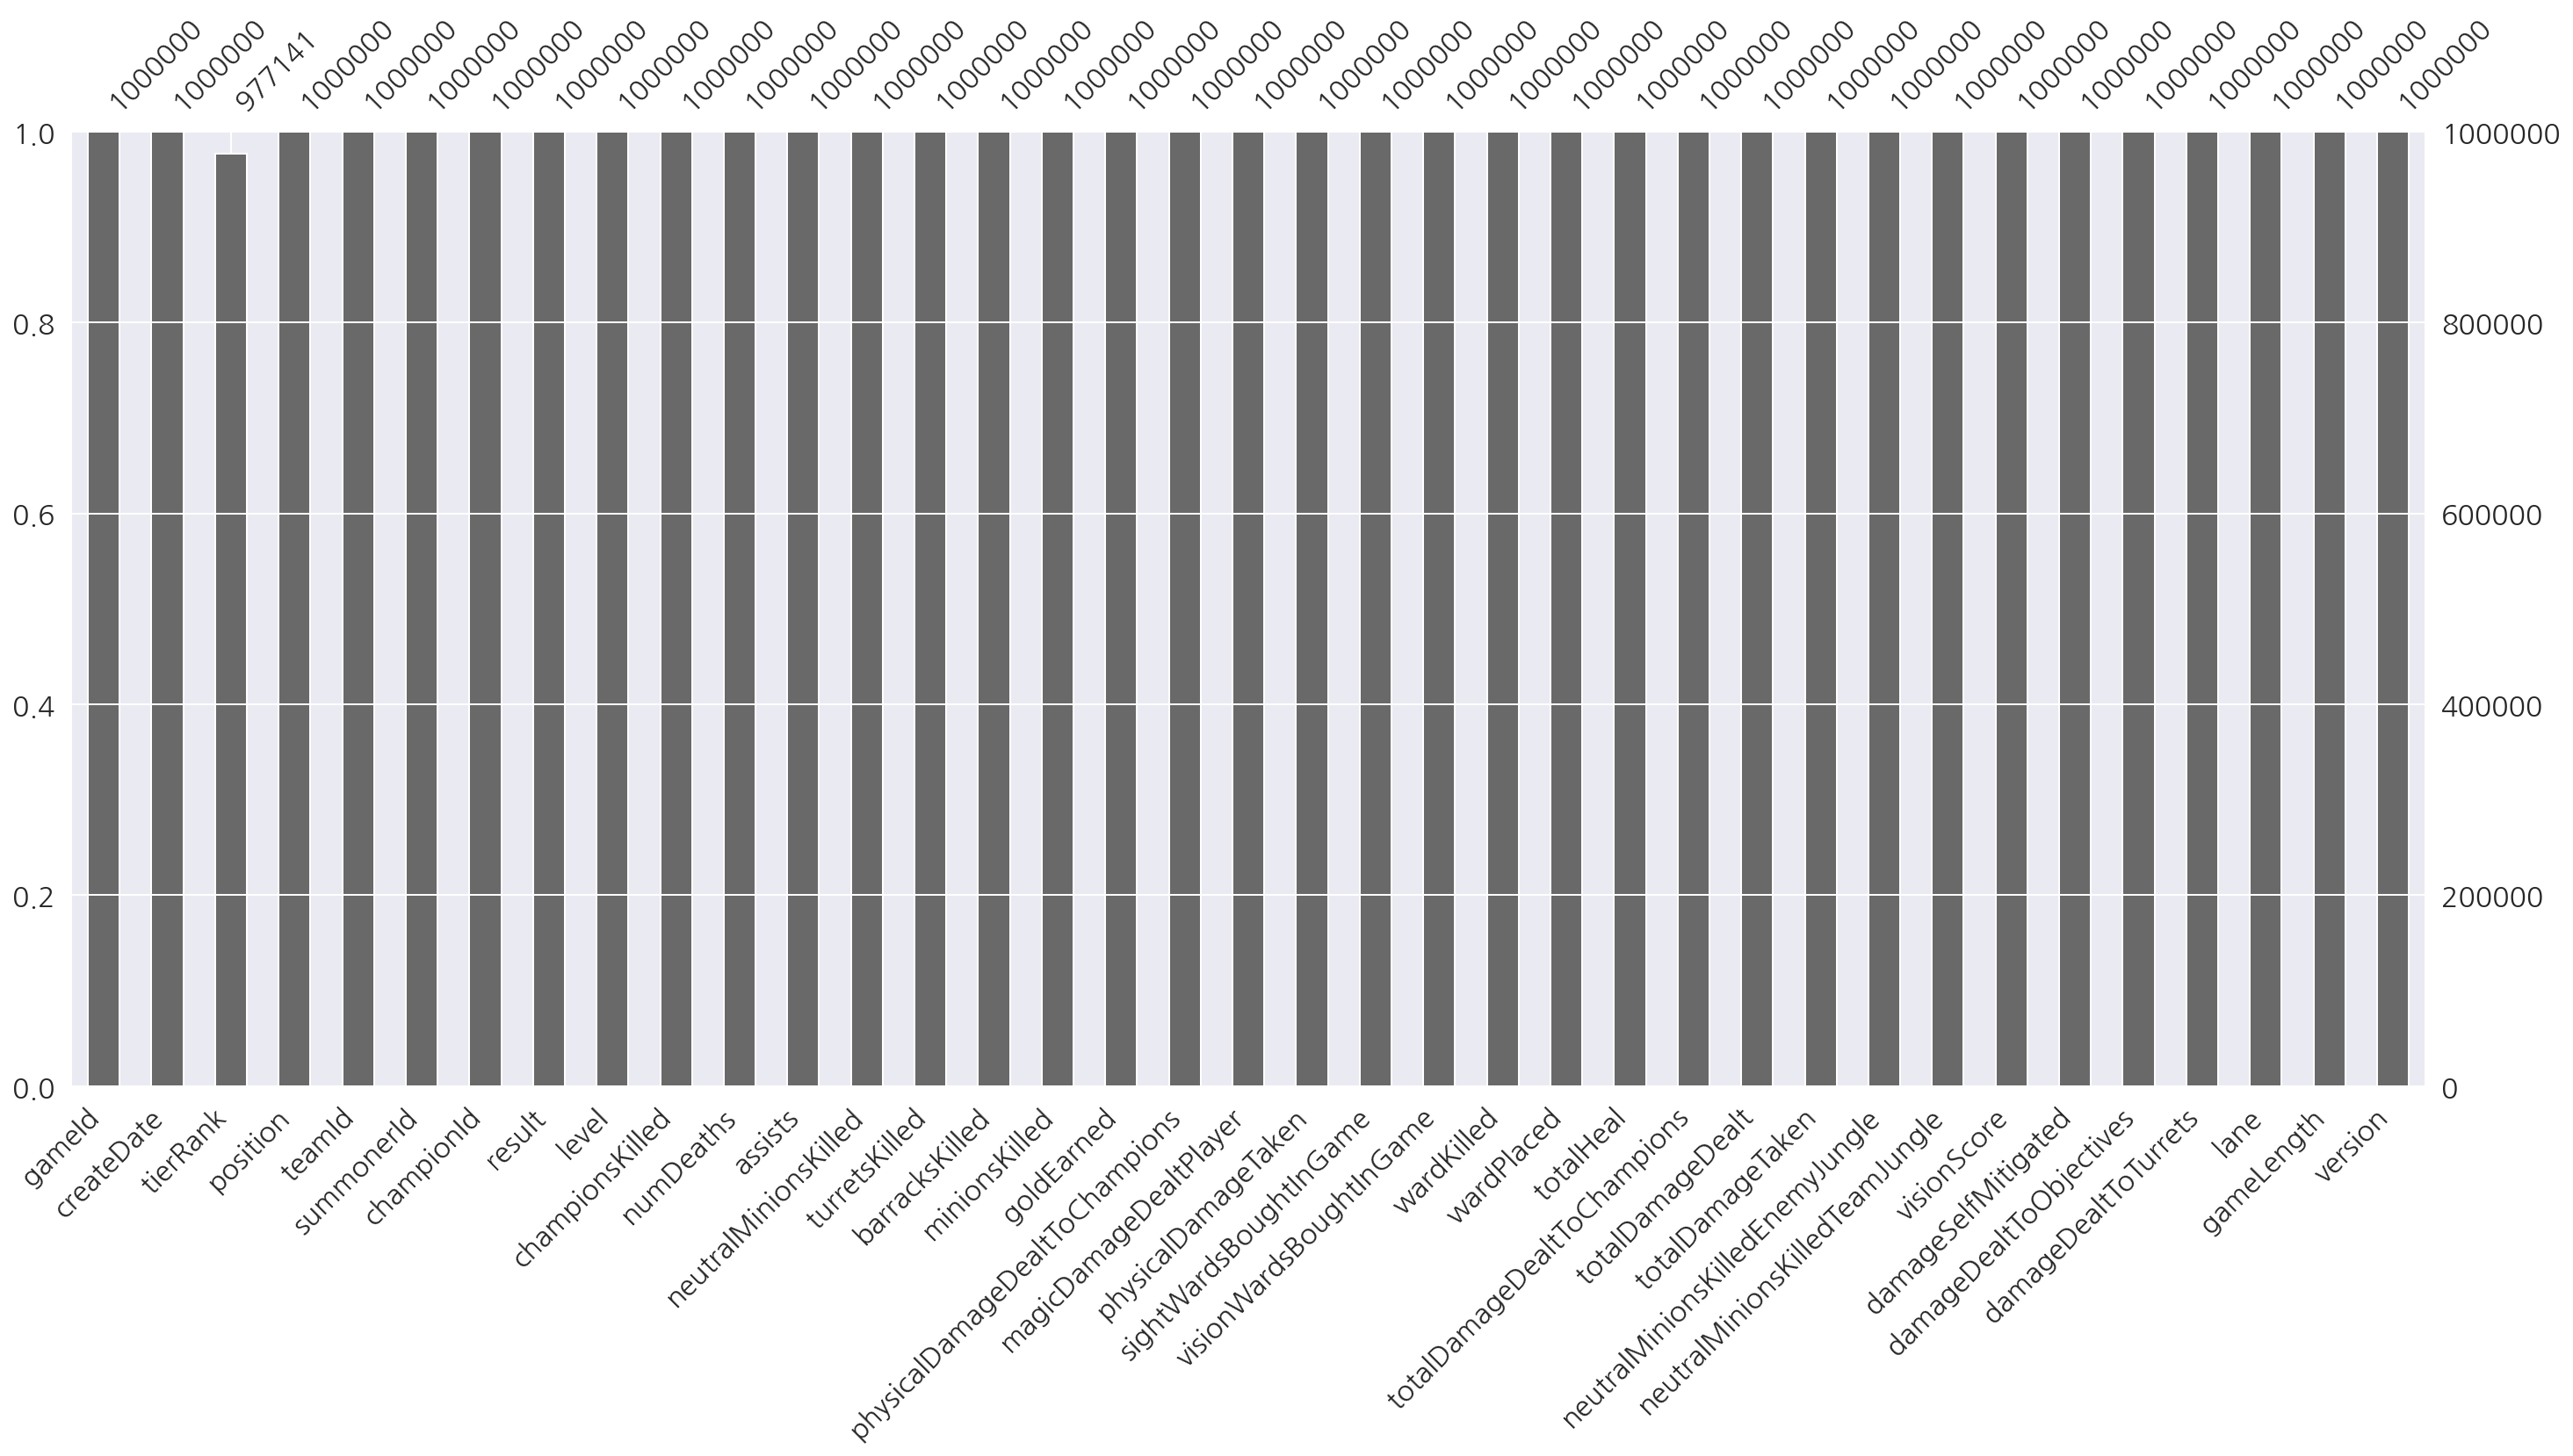

In [49]:
# missingno 패키지 사용
import missingno as msno

msno.bar(data)

- tierRank에 결측값 존재하는 것 확인 가능

In [50]:
# 결측값 제거
data1 = data[data["tierRank"].notnull()].copy()

In [51]:
# 첫 글자 가져오기 apply
data1["tier"] = data1["tierRank"].apply(lambda x: x[0])

- 이제 float형태가 아니므로 잘 적용된다.

In [52]:
# 특정 문자가 있는지
data1[data1["tierRank"].str.contains("C")]

,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,championsKilled,...,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version,tier
36518,5383988789,2021-08-11 11:21:27,C1907,T,200,86094085,39,WIN,16,6,...,1,1,26,21058,13819,10387,TOP,1592,11.16.390.1945,C
205196,5384285152,2021-08-11 12:34:20,C1819,J,100,87214832,234,LOSE,12,2,...,1,101,34,16263,4647,0,JUNGLE,1531,11.16.390.1945,C
206972,5384286004,2021-08-11 12:43:57,C1868,J,100,41780873,68,WIN,15,12,...,20,100,37,17796,32194,1021,JUNGLE,1612,11.16.390.1945,C
210966,5384288138,2021-08-11 13:09:53,C1906,M,100,86094085,13,WIN,18,8,...,12,15,31,11095,26446,8164,TOP,1859,11.16.390.1945,C
210969,5384288138,2021-08-11 13:09:53,C1843,T,200,87299019,150,LOSE,17,5,...,0,3,26,27323,5388,0,TOP,1859,11.16.390.1945,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944443,5384634868,2021-08-11 16:27:29,C1836,J,200,84679870,234,LOSE,10,2,...,17,58,20,8843,12620,0,NONE,1148,11.16.390.1945,C
950550,5384637692,2021-08-11 16:57:07,C1918,J,100,6300872,131,WIN,16,5,...,20,100,20,19966,43562,2366,JUNGLE,1774,11.16.390.1945,C
950551,5384637692,2021-08-11 16:57:07,C1857,S,200,13583512,48,LOSE,13,2,...,0,0,70,20091,2733,1103,BOTTOM,1774,11.16.390.1945,C
950554,5384637692,2021-08-11 16:57:07,C1864,M,200,79280308,7,LOSE,17,19,...,0,16,32,13141,10980,8699,MIDDLE,1774,11.16.390.1945,C


In [53]:
data1["tier"].value_counts()

S    350067
G    332395
B    127999
P    125914
D     26826
I     10052
M      2965
R       712
C       211
Name: tier, dtype: int64

In [54]:
# 티어별 카테고리 생성
data1["tier_category"] = data1['tier'].apply(lambda x: 1 if x=="I"
                                             else 2 if x=="B"
                                             else 3 if x=="S"
                                             else 4 if x=="G"
                                             else 5 if x=="P"
                                             else 6 if x=="D"
                                             else 7 if x=="M"
                                             else 8 if x=="R"
                                             else 9 if x=="C"
                                             else 0)

In [55]:
data1[["tier", "tier_category"]]

,tier,tier_category
0,P,5
1,P,5
2,P,5
3,P,5
4,P,5
...,...,...
999995,S,3
999996,G,4
999997,G,4
999998,S,3


In [56]:
# 티어별 카테고리 생성 2
def tier_category_function(x):
    if x=="I":
        return 1
    if x=="B":
        return 2
    if x=="S":
        return 3
    if x=="G":
        return 4
    if x=="P":
        return 5
    if x=="D":
        return 6
    if x=="M":
        return 7
    if x=="R":
        return 8
    if x=="C":
        return 9

In [57]:
data1["tier_category2"] = data1['tier'].apply(lambda x: tier_category_function(x))

In [58]:
len(data1["tier_category"] == data1["tier_category2"])

977141

In [59]:
# 내가 만든 함수 불러오기
from Day09_01_module import champion_load
champion_load()

,champion
266,Aatrox
103,Ahri
84,Akali
166,Akshan
12,Alistar
...,...
238,Zed
115,Ziggs
26,Zilean
142,Zoe


- 미리 만들어둔 Day09_01_module 파일에 champion_load 함수를 불러와 사용하였다.

# 3. 와드와 승률의 상관관계

In [75]:
# 승리여부 1,0으로 변환
data_me = data[["wardPlaced", "result"]]
data_me["result"] = data_me["result"].apply(lambda x: 1 if x=="WIN" else 0)

In [87]:
# 승률 계산
def count_sum(x):
    win_rate = x['result'].sum() / x['result'].count()
    
    return pd.Series(win_rate, index=["win_rate"])

temp = data_me.groupby("wardPlaced", as_index=False).apply(count_sum)

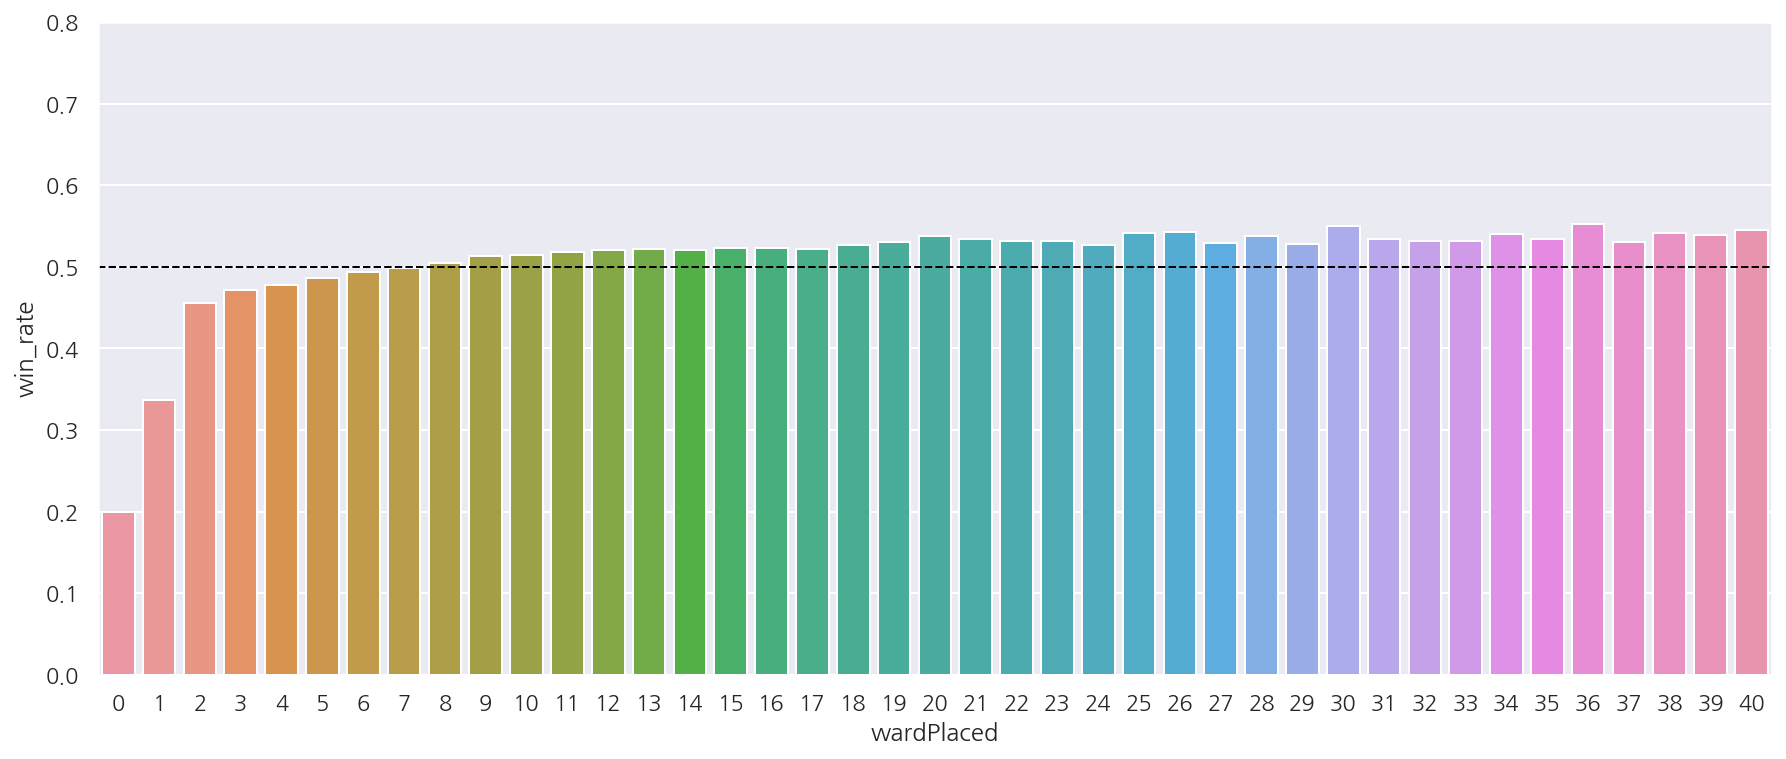

In [98]:
# 와드수 40개 이하만
temp_ward40 = temp[temp["wardPlaced"] <= 40]

# bar chart
fig, axs = plt.subplots(1,1, figsize=(15,6))

sns.barplot(data = temp_ward40, x = "wardPlaced", y = "win_rate", ci = None, ax= axs)
axs.axhline(0.5, ls='--', lw=1, color='black')
axs.set_ylim(0,0.8)

plt.show()